# Data Ingestion and EDA 
## Problem Statement (Classification)

### Predict whether income exceeds 50K dollor/yr based on census data. Also known as "Adult" dataset

#### List of attributes:

- target >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Data ingestion

- First download data from this link: https://archive.ics.uci.edu/ml/datasets/Census+Income
- load data

In [1]:
# Import librries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Define the name of columns
cols_name = ['age','workclass', 'fnlwgt','education','education-num', 'marital-status', 'occupation', 'relationship', 'race',
        'sex', 'capital-gain' , 'capital-loss', 'hours-per-week', 'native-country', 'target']
#Load train data
train = pd.read_csv('adult.data', na_values='?',  index_col=False , skipinitialspace= True,
                    header=None, names=cols_name)
# print sample of train data
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
#Laod test data
test = pd.read_csv('adult.test',  na_values='?', skipinitialspace= True, index_col=False , 
                   header=None, names=cols_name, skiprows=1)
# print sample of test data
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


## Profile

In [31]:
# Shape of train and test data
print('Shape of train dataset: ', train.shape)
print('Shape of test  dataset: ', test.shape)

Shape of train dataset:  (32561, 15)
Shape of test  dataset:  (16281, 15)


In [23]:
# Print some information about data, datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
# statistical information about data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**There is some outliers in most of the columns**

In [197]:
# Number of unique value in each column
train.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
target                2
dtype: int64

**For sex and target we can use onehot encding but other number of categories of other categorical data are high and by onehot encoding the dimention of our data will increase and we need to choose other method**

In [26]:
#Number of nan value per column
train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [30]:
# Number of duplicated value per column
train.duplicated().sum()

24

In [34]:
num_cols = [x for x in train.columns if train[x].dtype != 'O']
cat_cols = [x for x in train.columns if train[x].dtype == 'O']
print(f'Numerical columns name: {num_cols} \nCategorical columns name: {cat_cols}')

Numerical columns name: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 
Categorical columns name: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'target']


## Univariate analysis

In [39]:
# Percentage of each class 
train['target'].value_counts() / train.shape[0] * 100

<=50K    75.919044
>50K     24.080956
Name: target, dtype: float64

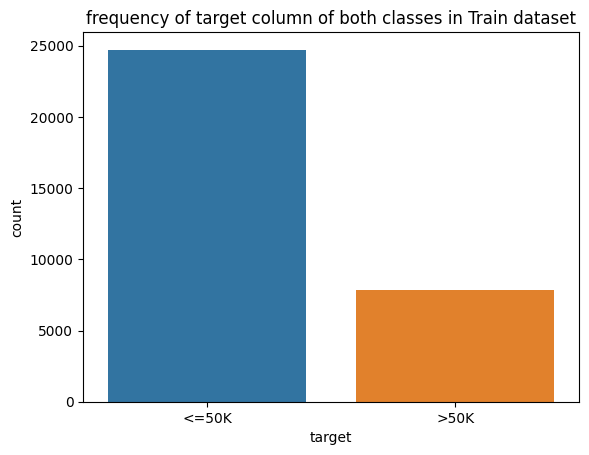

In [206]:
sns.countplot(data=train, x = 'target')
plt.title('frequency of target column of both classes in Train dataset');

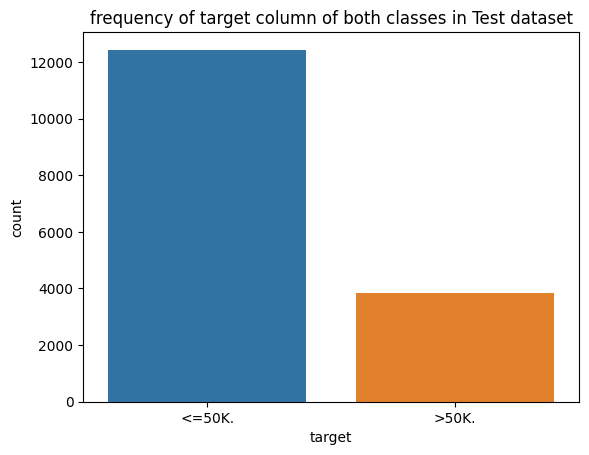

In [207]:
sns.countplot(data=test, x = 'target')
plt.title('frequency of target column of both classes in Test dataset');

**The data is imbalance and it may lead model to bais toward majority class**

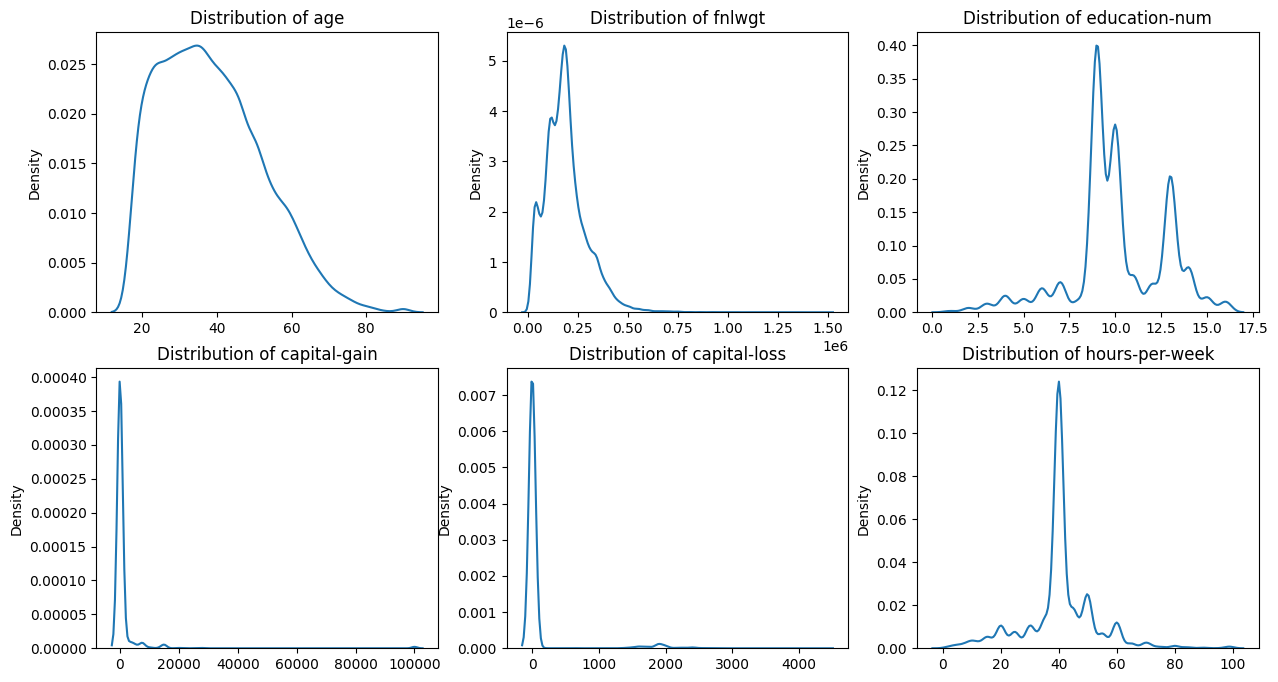

In [57]:
# Numerical columns distribution
i= 1
plt.figure(figsize=(15,8))
for col in num_cols:
    plt.subplot(2 ,3 ,i)
    sns.kdeplot(train[col]) 
    plt.title('Distribution of '+ col)
    plt.xlabel('')
    i+=1

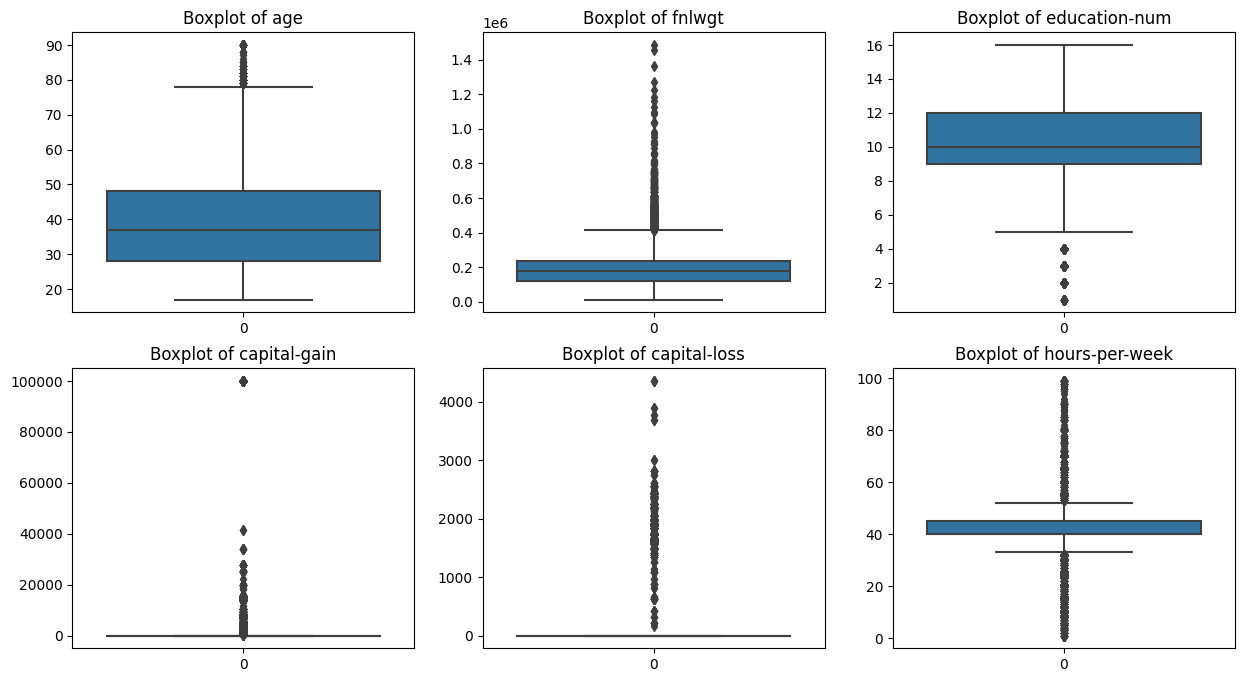

In [79]:
# Numerical columns outliers
i= 1
plt.figure(figsize=(15,8))
for col in num_cols:
    plt.subplot(2 ,3 ,i)
    sns.boxplot(train[col]) 
    plt.title('Boxplot of '+ col)
    plt.xlabel('')
    i+=1

**Report:**
- most of the people are beween 20 to 40 and the age column has almost normal distibution with small amount of outliers
- fnlwgt, capital_gain and capital_loss are right skew
- hours-per-week has almost normal distibution 
- most of the people working around 40 hours per week which means fulltime job
- capital-gain and capital-loss seems correlated

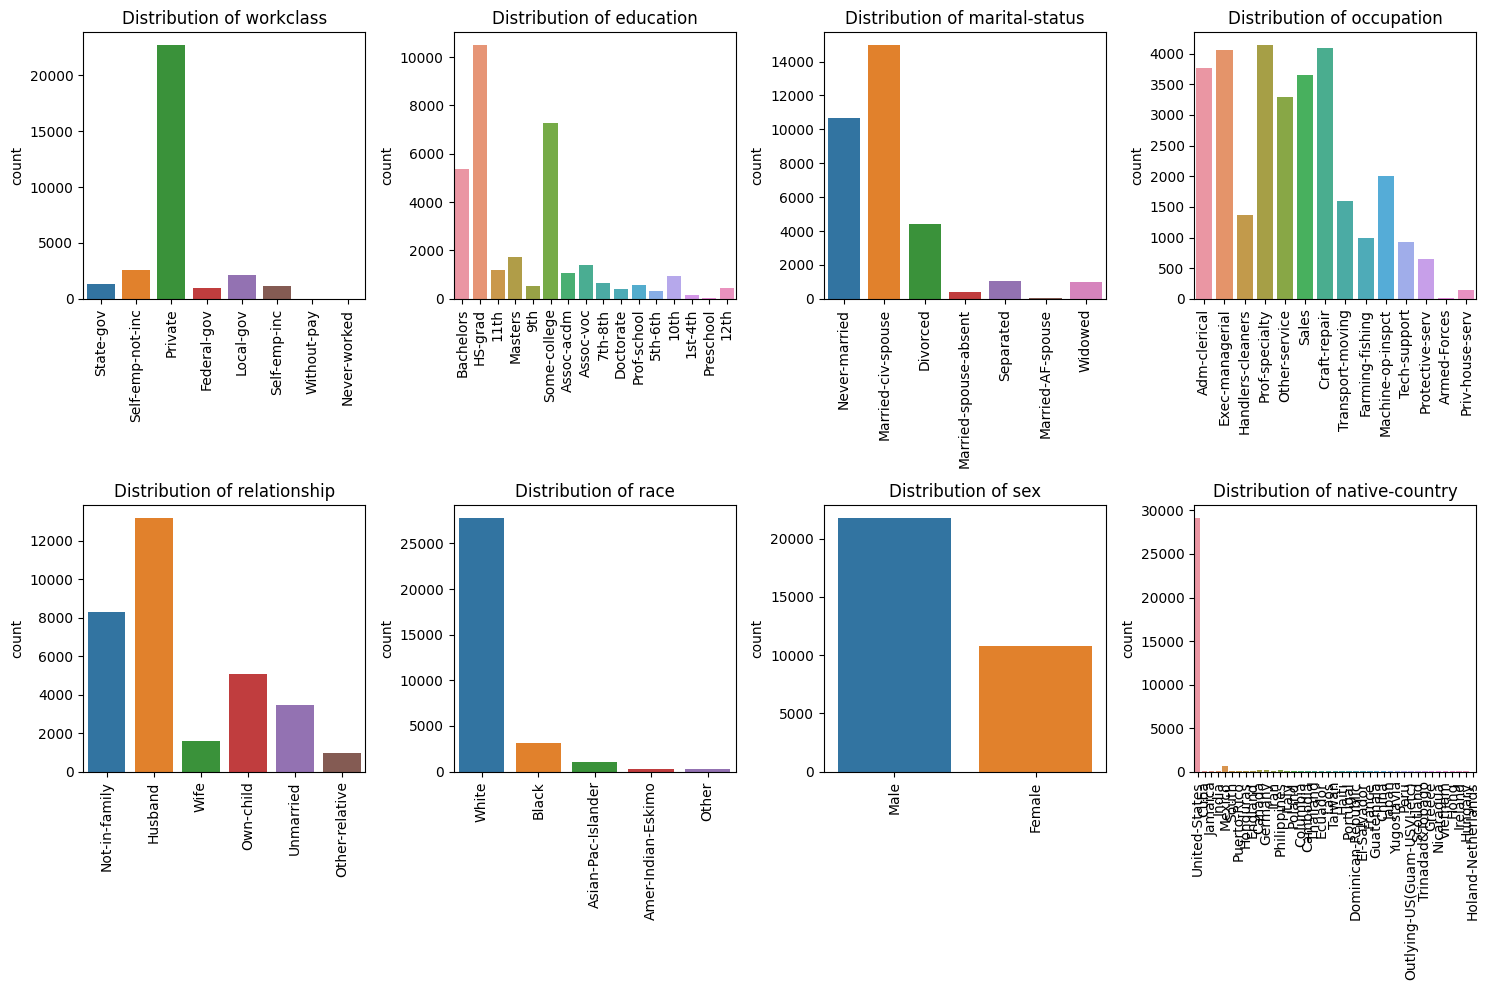

In [78]:
# Categorical columns distibution
i= 1
plt.figure(figsize=(15,10))
for col in cat_cols[:-1]:
    plt.subplot(2 ,4,i)
    sns.countplot(data = train, x = col) 
    plt.title('Distribution of '+ col)
    plt.xlabel('')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    i+=1

**Report:**
- number of private job class is huge as compared to other job class 
- bachelores, HS graid and some collage are the top 3 category of education
- most of the people who work are married or never marrid
- the number of men workers is almost double of women workers
- mot of the workers are white 
- most of the populations are from united state

In [82]:
# percentage of workers of first 10 country based on population
train['native-country'].value_counts()[:10] / train.shape[0]  * 100

United-States    89.585701
Mexico            1.974755
Philippines       0.608089
Germany           0.420749
Canada            0.371610
Puerto-Rico       0.350112
El-Salvador       0.325543
India             0.307116
Cuba              0.291760
England           0.276404
Name: native-country, dtype: float64

In [169]:
train['native-country'].value_counts()[:10] 

United-States    29170
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
England             90
Name: native-country, dtype: int64

In [135]:
print('percentage of people who gain capital: ', len(train[train['capital-gain']> 0]) / train.shape[0] *100)
print('percentage of people who loss capital: ', len(train[train['capital-loss']> 0]) / train.shape[0] *100)

percentage of people who gain capital:  8.328982525106724
percentage of people who loss capital:  4.66509013850926


## Biovariate analysis

<AxesSubplot: xlabel='sex', ylabel='count'>

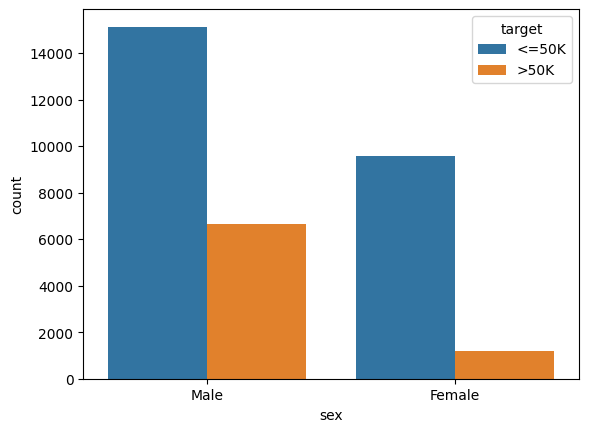

In [91]:
sns.countplot(data=train, x = 'sex' , hue='target')

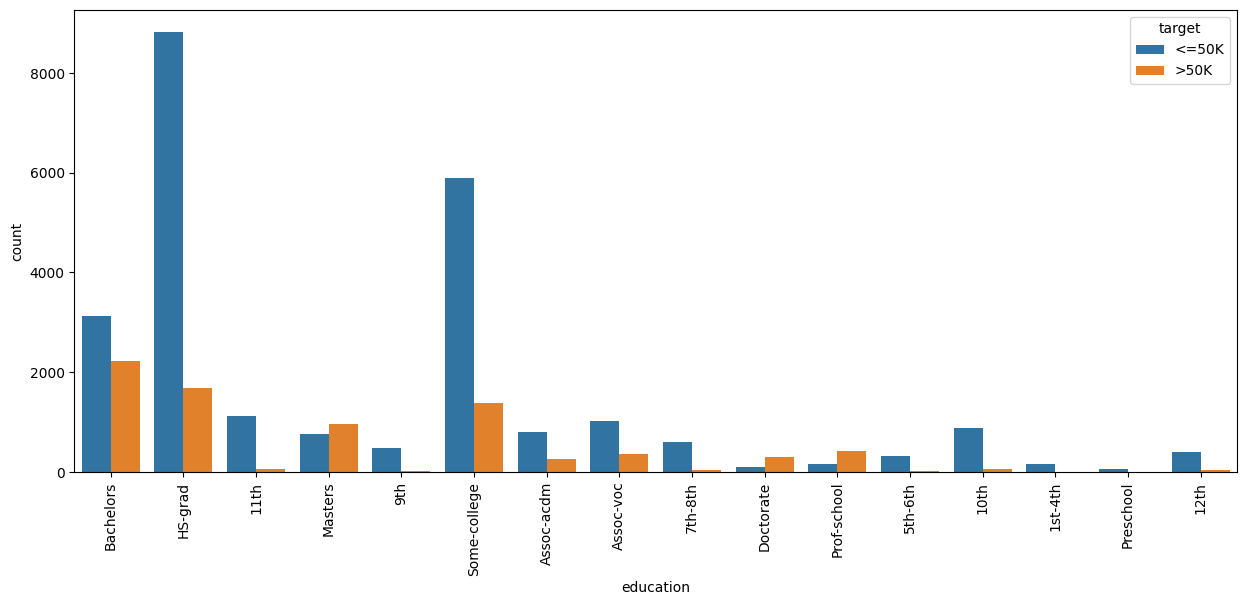

In [89]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x = 'education' , hue='target')
plt.xticks(rotation = 90);

**Number of people with less than 50K salary in all categories are more exept Doctorate and Prof-school** 

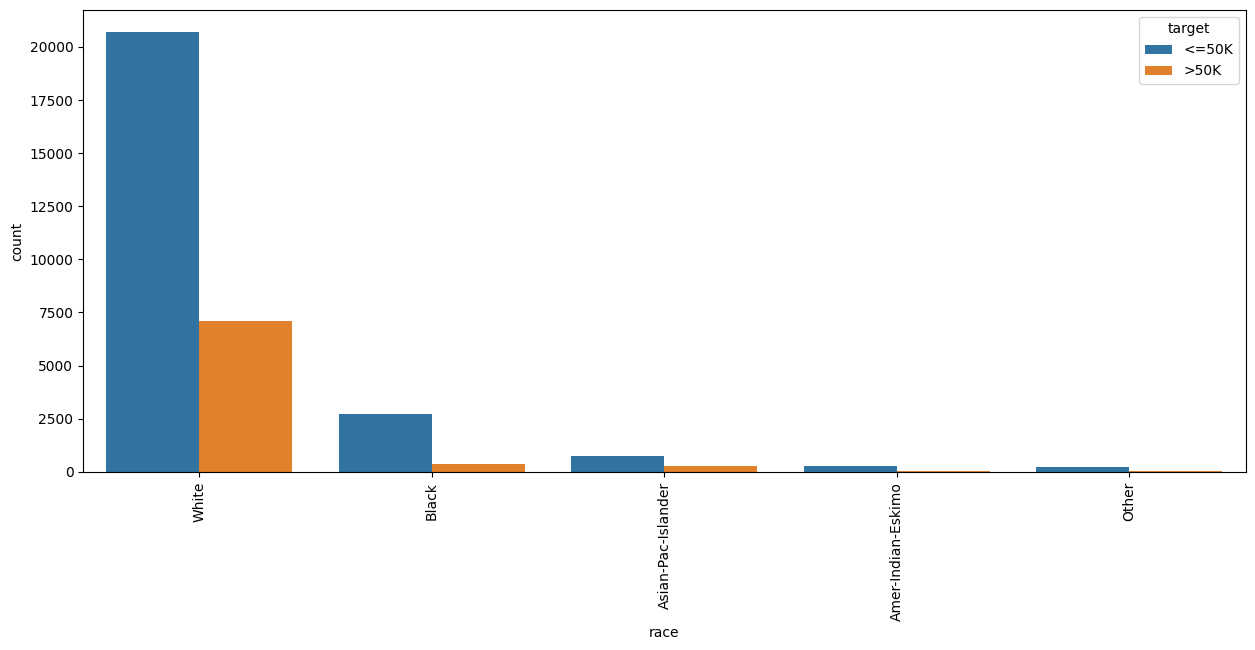

In [92]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x = 'race' , hue='target')
plt.xticks(rotation = 90);

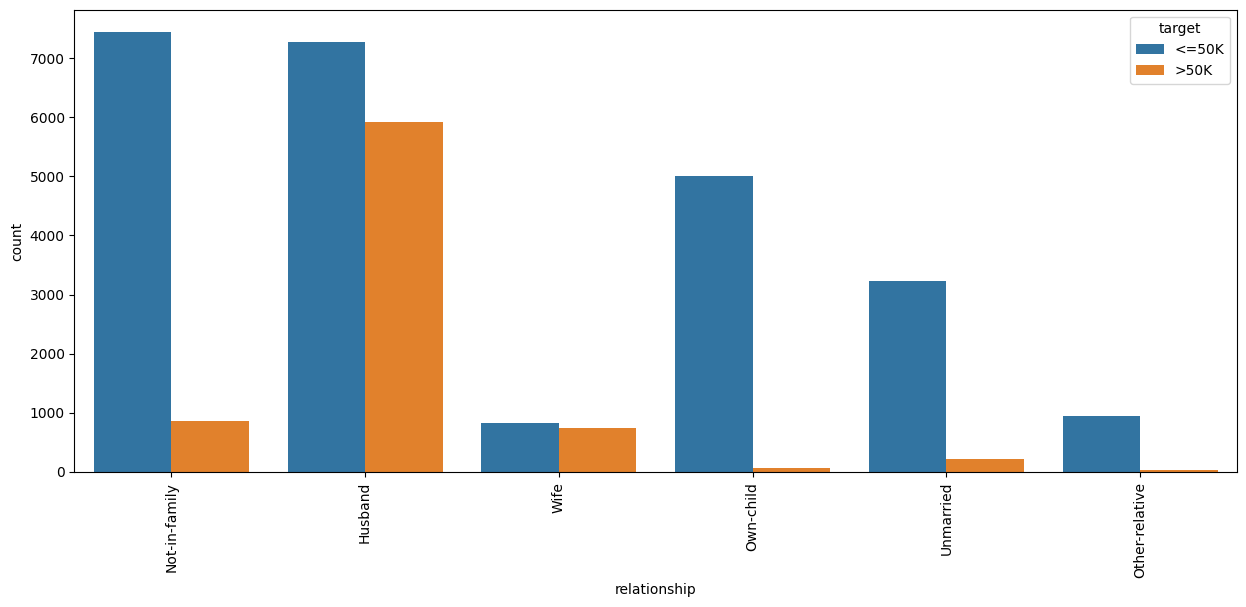

In [93]:
plt.figure(figsize=(15,6))
sns.countplot(data=train, x = 'relationship' , hue='target')
plt.xticks(rotation = 90);

<AxesSubplot: xlabel='age', ylabel='Density'>

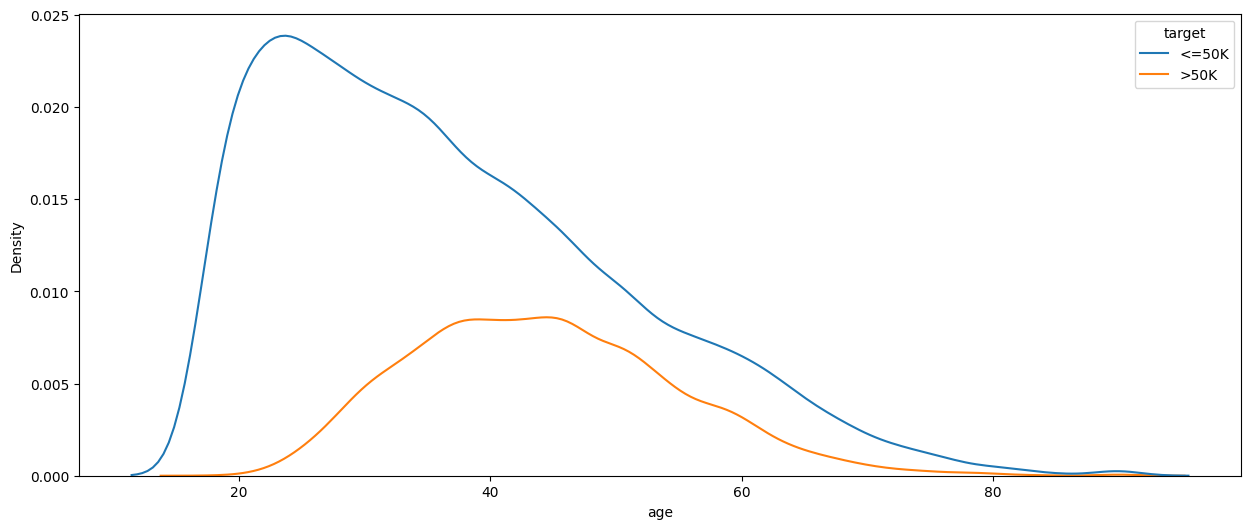

In [97]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x = 'age' , hue='target')

**age of <=50k Poeple are mostly between 20 to 30 while >50K are between 40  to 50 with normal distibution it means when age increase salary also will increase till 50 then slalary decrease again**  

<AxesSubplot: xlabel='fnlwgt', ylabel='Density'>

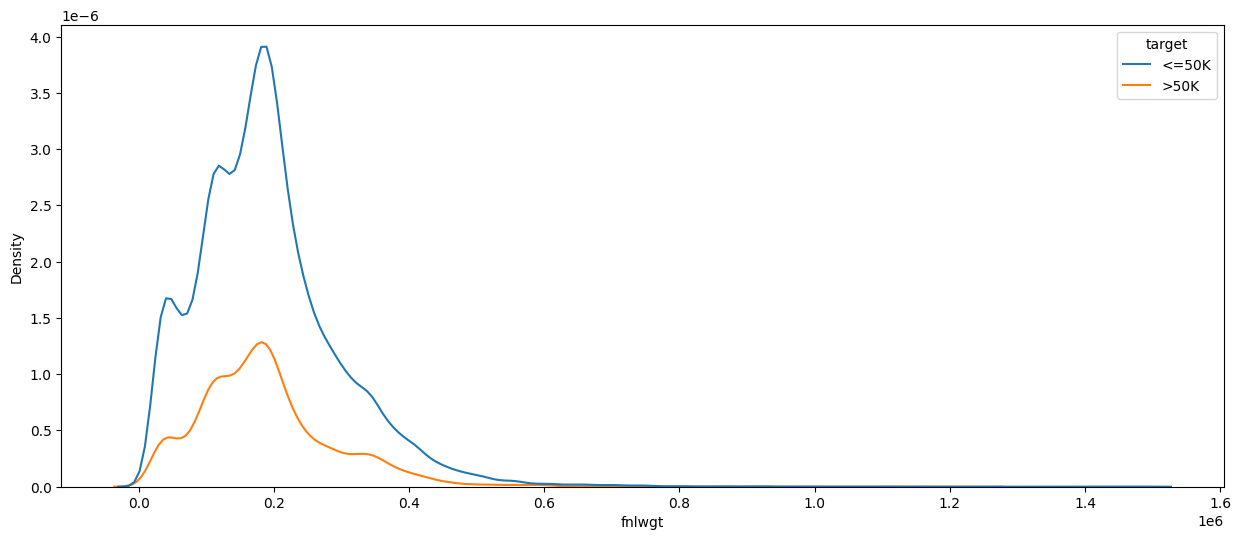

In [98]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x = 'fnlwgt' , hue='target')

<AxesSubplot: xlabel='hours-per-week', ylabel='Density'>

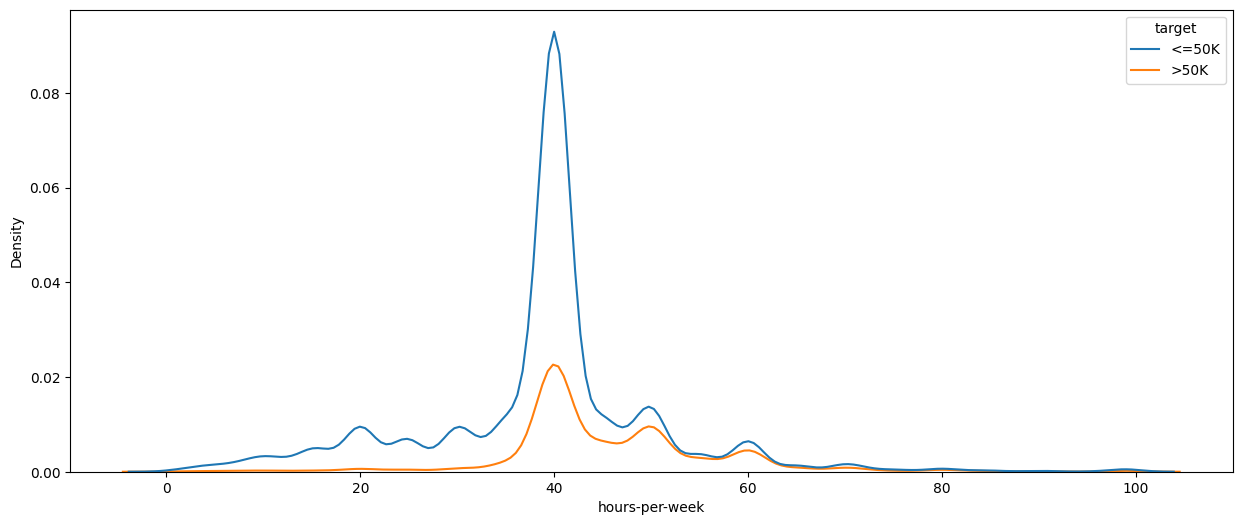

In [100]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=train, x = 'hours-per-week' , hue='target')

**For these two columns the distibution per group of salary is same but because number of people in each group are different the plot of <=50 are more high**

<AxesSubplot: xlabel='capital-gain', ylabel='capital-loss'>

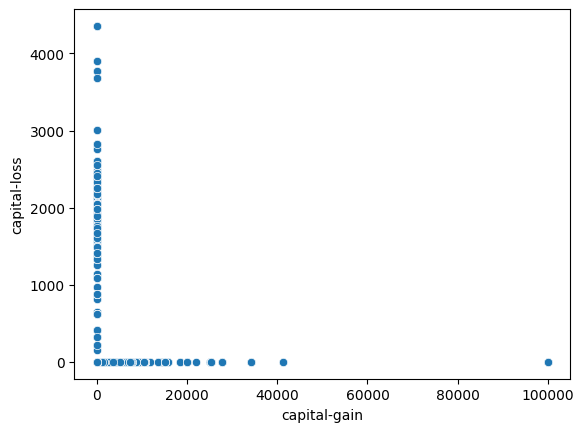

In [107]:
sns.scatterplot(data=train , x ='capital-gain', y='capital-loss')

**These two columns have some correlation when loss increase gain remain zero and when gain increase loss remain zero** 

In [115]:
train.groupby(['education'])['education-num'].value_counts()

education     education-num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: education-num, dtype: int64

**The value of these two columns are similar then we caan drop one of them later**

In [139]:
train.groupby(['target'])['hours-per-week'].mean().sort_values(ascending = False)

target
>50K     45.473026
<=50K    38.840210
Name: hours-per-week, dtype: float64

In [138]:
train.groupby(['education-num'])['hours-per-week'].mean().sort_values(ascending = False)

education-num
15    47.425347
16    46.973366
14    43.836332
13    42.614006
11    41.610709
9     40.575374
12    40.504217
4     39.366873
3     38.897898
10    38.852284
2     38.255952
5     38.044747
6     37.052519
1     36.647059
8     35.780600
7     33.925957
Name: hours-per-week, dtype: float64

In [164]:
train[train['capital-gain'] == 0].shape , train[train['capital-gain']>0].shape

((29849, 15), (2712, 15))

In [165]:
train[train['capital-loss'] == 0].shape , train[train['capital-loss']>0].shape

((31042, 15), (1519, 15))

## Multivarite analysis

In [124]:
train.groupby(['education-num'])['capital-loss', 'capital-gain'].mean().sort_values(ascending = False, by = 'capital-gain')

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_13620\1219447822.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['education-num'])['capital-loss', 'capital-gain'].mean().sort_values(ascending = False, by = 'capital-gain')


,capital-loss,capital-gain
education-num,,
15,231.203125,10414.416667
16,262.845036,4770.145278
14,166.719675,2562.563552
13,118.350327,1756.299533
1,66.490196,898.392157
11,72.754703,715.051375
12,93.418932,640.399250
10,71.637087,598.824167
9,70.466622,576.800114


**People with higher education gain more apital and also lost more capital exept category 1 which invest more and loss less**

In [125]:
train.groupby(['target'])['capital-loss', 'capital-gain'].mean().sort_values(ascending = False, by = 'capital-gain')

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_13620\231297790.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['target'])['capital-loss', 'capital-gain'].mean().sort_values(ascending = False, by = 'capital-gain')


,capital-loss,capital-gain
target,,
>50K,195.001530,4006.142456
<=50K,53.142921,148.752468


In [108]:
train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


**There is not any strong relation between numerical variables**

In [110]:
train.cov()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,186.061400,-1.103507e+05,1.281849,7.824819e+03,317.560742,11.580130
fnlwgt,-110350.685300,1.114080e+10,-11729.527298,3.366625e+05,-436030.333167,-24460.426185
education-num,1.281849,-1.172953e+04,6.618890,2.330008e+03,82.856445,4.705338
capital-gain,7824.818537,3.366625e+05,2330.007877,5.454254e+07,-94085.760688,7150.032029
capital-loss,317.560742,-4.360303e+05,82.856445,-9.408576e+04,162376.937814,269.953755
hours-per-week,11.580130,-2.446043e+04,4.705338,7.150032e+03,269.953755,152.458995


<AxesSubplot: >

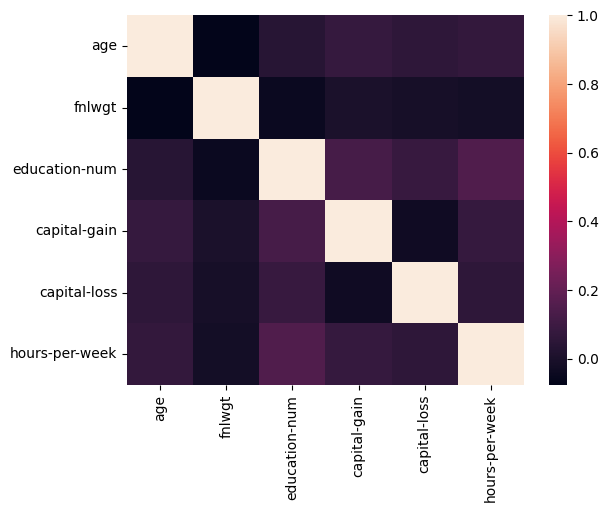

In [111]:
sns.heatmap(train.corr())

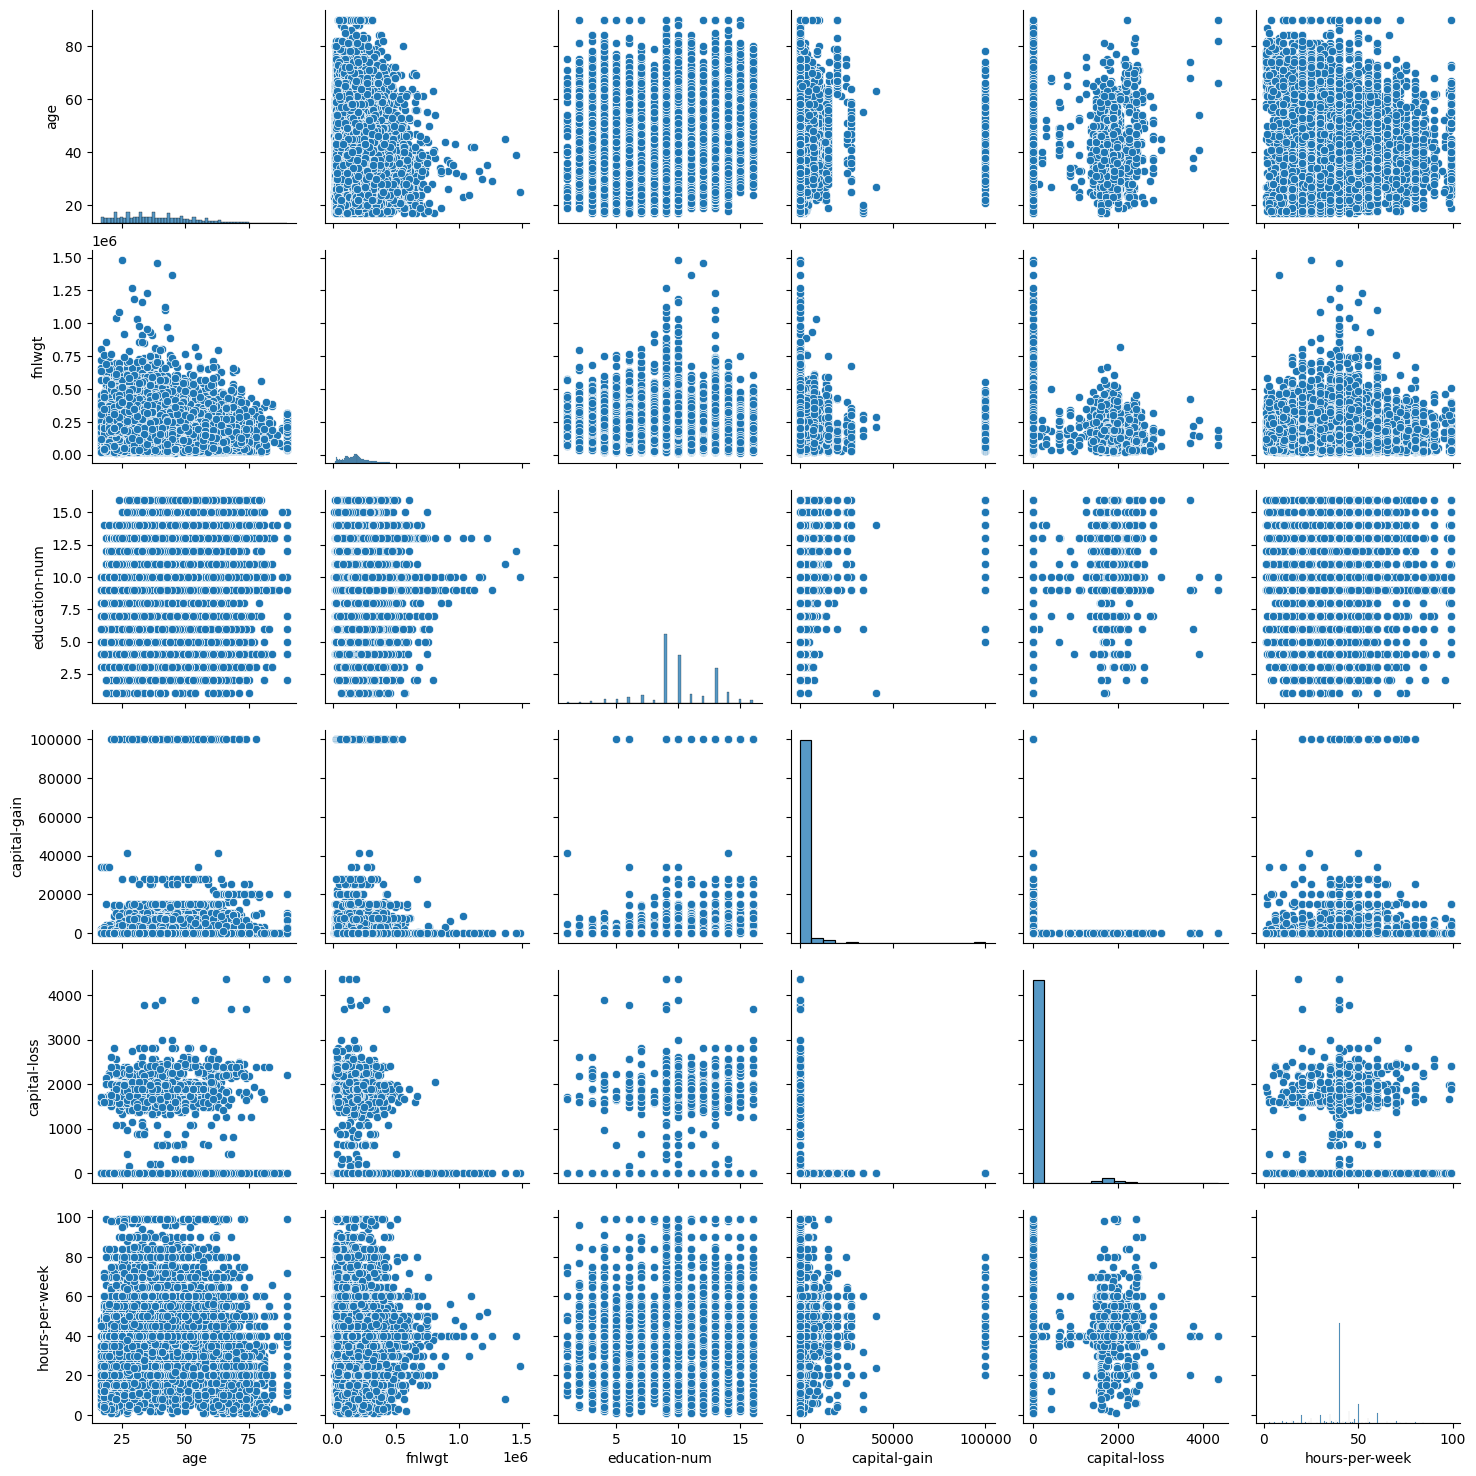

In [126]:
sns.pairplot(train)

## Deep analysis for missing values

In [168]:
train['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [155]:
train['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [154]:
train[(train['occupation'].isna()) & (train['workclass'].notna())]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


**We can fill the occupation of these 7 rows with workclass=Never-worked to No-Occupation after this change all the Nan value of both workclass and occupation will be same**

In [172]:
train[train['workclass'].isna()]['target'].value_counts()

<=50K    1645
>50K      191
Name: target, dtype: int64

**The Nan values are beloged to both target category then data**

In [173]:
test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
target              0
dtype: int64

In [174]:
test[(test['occupation'].isna()) & (test['workclass'].notna())]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
8785,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
13898,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


**The situation of missing value for test data is similr to train data then we can select same strategy for them**

In [175]:
test[test['workclass'].isna()]['target'].value_counts()

<=50K.    889
>50K.      74
Name: target, dtype: int64

In [182]:
train['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [201]:
train['fnlwgt'].nunique()/ train.shape[0]*100

66.48444458094039

**This field for 66% f data is unique the we can remove it** 

In [202]:
train[cat_cols].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
target             2
dtype: int64

In [203]:
test[cat_cols].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    40
target             2
dtype: int64

**Number od categories are same in both train and test data**